# Agregación de datos y operaciones de grupo

Categorizar un conjunto de datos y aplicar una función a cada grupo, ya sea una agregación o transformación, es a menudo un componente crítico de un flujo de trabajo de análisis de datos. Pandas proporciona un
interfaz de grupo flexible, que le permite dividir, fragmentar y resumir conjuntos de datos en una manera natural


*   Dividir un objeto pandas en pedazos usando una o más llaves (en forma de funciones, arrays o nombres de columna de DataFrame)
*   Calcular estadísticas de resumen de grupo, como recuento, media o desviación estándar, o una función definida por el usuario

In [4]:
import numpy as np
import pandas as pd

## GroupBy y sus mecánicas

Las tareas de agregacion con groupBy las podemos dividir en 3 pasos  


*   Dividir: Partir los datos en grupos basados en una o mas llaves.
*   Aplicar: A cada grupo aplicar una funcion que resulte en un nuevo valor.
*   Combinar: Juntar los resultados de las operaciones anteriores en un nuevo objeto resultado.



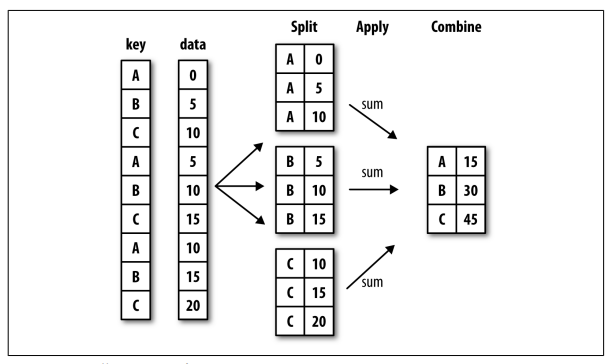

In [5]:
df = pd.DataFrame({
    'llave_1': ['a', 'a', 'b', 'b', 'a'],
    'llave_2': ['one', 'two', 'one', 'two', 'one'],
    'data1': np.random.randn(5),
    'data2': np.random.randn(5)
})

df

,llave_1,llave_2,data1,data2
0,a,one,0.304541,0.374890
1,a,two,-0.902751,0.543137
2,b,one,0.178542,-0.901220
3,b,two,0.175215,-0.567298
4,a,one,0.097486,0.360801


In [6]:
grouped = df['data1'].groupby(df['llave_1'])
grouped

Si aplicamos alguna funcion de agregacion a un objeto groupBy se aplicara a cada grupo definido por las llaves pasadas a la funcion groupBy

In [7]:
grouped.mean()

llave_1
a   -0.166908
b    0.176879
Name: data1, dtype: float64

In [8]:
mean = df['data1'].groupby([df['llave_1'], df['llave_2']]).mean()
mean

llave_1  llave_2
a        one        0.201014
         two       -0.902751
b        one        0.178542
         two        0.175215
Name: data1, dtype: float64

Unstack nos permite convertir la serie con dos niveles de indices en un dataframe

In [11]:
mean.unstack()

llave_2,one,two
llave_1,,
a,0.201014,-0.902751
b,0.178542,0.175215


En este ejemplo agregamos columnas y agrupamos por ellas

In [12]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [13]:
df

,llave_1,llave_2,data1,data2
0,a,one,0.304541,0.374890
1,a,two,-0.902751,0.543137
2,b,one,0.178542,-0.901220
3,b,two,0.175215,-0.567298
4,a,one,0.097486,0.360801


In [15]:
df_1 = df.copy()
df_1

,llave_1,llave_2,data1,data2
0,a,one,0.304541,0.374890
1,a,two,-0.902751,0.543137
2,b,one,0.178542,-0.901220
3,b,two,0.175215,-0.567298
4,a,one,0.097486,0.360801


In [18]:
df_1['estado'] = states
df_1['periodo'] = years
df_1[['estado', 'periodo', 'data1']]

,estado,periodo,data1
0,Ohio,2005,0.304541
1,California,2005,-0.902751
2,California,2006,0.178542
3,Ohio,2005,0.175215
4,Ohio,2006,0.097486


In [20]:
df_1.groupby (['estado', 'periodo']).mean()['data1']

estado      periodo
California  2005      -0.902751
            2006       0.178542
Ohio        2005       0.239878
            2006       0.097486
Name: data1, dtype: float64

Alternativamente, podemos pasar los arrays de llaves deseadas y groupby las usara si son del tamano correcto

In [24]:
df['data1'].groupby([states, years]).mean()

California  2005   -0.902751
            2006    0.178542
Ohio        2005    0.239878
            2006    0.097486
Name: data1, dtype: float64

Si la informacion de las llaves esta contenida en el df, se puede usar el nombre de la columna para agrupar

In [25]:
df

,llave_1,llave_2,data1,data2
0,a,one,0.304541,0.374890
1,a,two,-0.902751,0.543137
2,b,one,0.178542,-0.901220
3,b,two,0.175215,-0.567298
4,a,one,0.097486,0.360801


In [28]:
df.groupby('llave_1').mean()

,data1,data2
llave_1,,
a,-0.166908,0.426276
b,0.176879,-0.734259


In [29]:
df.groupby(['llave_1', 'llave_2']).mean()

data1     data2
llave_1 llave_2                    
a       one      0.201014  0.367846
        two     -0.902751  0.543137
b       one      0.178542 -0.901220
        two      0.175215 -0.567298

El objeto groupby acepta la iteracion, genera una secuencia de duplas conteniendo el nombre del grupo y el pedazo de datos que le corresponde

In [30]:
for name, group in df.groupby('llave_1'):
  print('-' * 40)
  print('Nombre del grupo' + name)
  print(group)

----------------------------------------
Nombre del grupoa
  llave_1 llave_2     data1     data2
0       a     one  0.304541  0.374890
1       a     two -0.902751  0.543137
4       a     one  0.097486  0.360801
----------------------------------------
Nombre del grupob
  llave_1 llave_2     data1     data2
2       b     one  0.178542 -0.901220
3       b     two  0.175215 -0.567298


En el caso multillave, el primer elemento sera una tupla con los nombres de las llaves

In [33]:
#Una tupla con el nombre de las llaves
#()tuplas + for... in
#[]listas
#{}diccionarios

for (k1, k2), group in df.groupby(['llave_1', 'llave_2']):
  print('-' * 40)
  print('Nombre de los grupos' + str((k1, k2)))
  print(group)

----------------------------------------
Nombre de los grupos('a', 'one')
  llave_1 llave_2     data1     data2
0       a     one  0.304541  0.374890
4       a     one  0.097486  0.360801
----------------------------------------
Nombre de los grupos('a', 'two')
  llave_1 llave_2     data1     data2
1       a     two -0.902751  0.543137
----------------------------------------
Nombre de los grupos('b', 'one')
  llave_1 llave_2     data1    data2
2       b     one  0.178542 -0.90122
----------------------------------------
Nombre de los grupos('b', 'two')
  llave_1 llave_2     data1     data2
3       b     two  0.175215 -0.567298


Podemos usar esto para hacer un diccionario con los grupos de datos!

In [35]:
pieces = dict(list(df.groupby('llave_1')))
pieces

{'a':   llave_1 llave_2     data1     data2
 0       a     one  0.304541  0.374890
 1       a     two -0.902751  0.543137
 4       a     one  0.097486  0.360801,
 'b':   llave_1 llave_2     data1     data2
 2       b     one  0.178542 -0.901220
 3       b     two  0.175215 -0.567298}

In [36]:
pieces['b']

,llave_1,llave_2,data1,data2
2,b,one,0.178542,-0.901220
3,b,two,0.175215,-0.567298


In [38]:
grouped = df.groupby(df.dtypes, axis = 1, )

Podemos agrupar a traves de las columnas tambien

In [39]:
for dtype, group in grouped:
  print('-' * 40)
  print('Tipo de datos: ' + str((dtype)))
  print(group)


----------------------------------------
Tipo de datos: float64
      data1     data2
0  0.304541  0.374890
1 -0.902751  0.543137
2  0.178542 -0.901220
3  0.175215 -0.567298
4  0.097486  0.360801
----------------------------------------
Tipo de datos: object
  llave_1 llave_2
0       a     one
1       a     two
2       b     one
3       b     two
4       a     one


### Seleccionando un subconjunto de columnas

Es posible seleccionar la columna a ser agregada por medio de indexacion despues de hacer el groupby.  
Esto es especialmente util a la hora de tratar con dataframes grandes  

In [41]:
df.groupby(['llave_1', 'llave_2'])[['data2']].mean()

data2
llave_1 llave_2          
a       one      0.367846
        two      0.543137
b       one     -0.901220
        two     -0.567298

In [43]:
s_grouped = df.groupby(['llave_1', 'llave_2'])['data2']
s_grouped.mean()

llave_1  llave_2
a        one        0.367846
         two        0.543137
b        one       -0.901220
         two       -0.567298
Name: data2, dtype: float64

In [60]:
people = pd.DataFrame(
    np.random.randn(5, 5), 
    columns = ['a', 'b', 'c', 'd', 'e'],
    index = ['Joe','Steve','Wes','Jim','Travis']
)
people

,a,b,c,d,e
Joe,-0.233439,1.687426,-2.145954,0.711159,-0.026429
Steve,-1.171567,-2.238520,-0.740754,-0.505252,2.788658
Wes,-0.429844,0.752009,1.177448,0.383961,0.546044
Jim,0.475463,-1.683082,0.598757,2.585683,0.314061
Travis,-0.652126,-0.207764,-1.311062,-0.395795,0.911188


In [48]:
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,1.299952,-0.475772,1.019616,0.952724,1.101537
Steve,-0.760285,-2.158735,-0.180093,-1.156199,0.858256
Wes,-0.559318,NaN,NaN,1.837306,0.561983
Jim,-0.902530,-0.030612,0.177477,-0.390867,-0.384958
Travis,-0.052535,0.629789,0.106064,-0.273215,-0.735064


Si tenemos un diccionario que mapee cierta correspondencia entre algun grupo y los indices de algun eje, es posible agrupar por dicho diccionario.

In [49]:
mapping = {'a': 'rojo', 'b': 'rojo', 'c': 'azul', 
           'd': 'azul', 'e': 'rojo', 'f': 'naranja'
    
}
mapping

{'a': 'rojo',
 'b': 'rojo',
 'c': 'azul',
 'd': 'azul',
 'e': 'rojo',
 'f': 'naranja'}

In [52]:
by_column = people.groupby(mapping, axis = 1)
by_column.sum()

,azul,rojo
Joe,1.972341,1.925718
Steve,-1.336292,-2.060765
Wes,1.837306,0.002665
Jim,-0.213390,-1.318100
Travis,-0.167150,-0.157810


Hemos mencionado antes la similitud entre las series y los diccionarios. En este ejemplo podemos hacer un mapeo con una serie y esto funciona de manera perfecta

In [53]:
map_series = pd.Series(mapping)
map_series 

a       rojo
b       rojo
c       azul
d       azul
e       rojo
f    naranja
dtype: object

In [56]:
people.groupby(map_series, axis = 1).count()

,azul,rojo
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [64]:
people.groupby(map_series, axis = 1).max()

,azul,rojo
Joe,0.711159,1.687426
Steve,-0.505252,2.788658
Wes,1.177448,0.752009
Jim,2.585683,0.475463
Travis,-0.395795,0.911188


In [59]:
mapping2 = {
    'a':'rojo', 'b':'negro', 'c':'amarillo',
    'd':'morado', 'e':'cafe', 'f':'naranja'
}
mapping2

{'a': 'rojo',
 'b': 'negro',
 'c': 'amarillo',
 'd': 'morado',
 'e': 'cafe',
 'f': 'naranja'}

In [62]:
people

,a,b,c,d,e
Joe,-0.233439,1.687426,-2.145954,0.711159,-0.026429
Steve,-1.171567,-2.238520,-0.740754,-0.505252,2.788658
Wes,-0.429844,0.752009,1.177448,0.383961,0.546044
Jim,0.475463,-1.683082,0.598757,2.585683,0.314061
Travis,-0.652126,-0.207764,-1.311062,-0.395795,0.911188


In [61]:
by_column2 = people.groupby(mapping2, axis= 1)
by_column2.max()

,amarillo,cafe,morado,negro,rojo
Joe,-2.145954,-0.026429,0.711159,1.687426,-0.233439
Steve,-0.740754,2.788658,-0.505252,-2.238520,-1.171567
Wes,1.177448,0.546044,0.383961,0.752009,-0.429844
Jim,0.598757,0.314061,2.585683,-1.683082,0.475463
Travis,-1.311062,0.911188,-0.395795,-0.207764,-0.652126


In [63]:
by_column.min()

,azul,rojo
Joe,0.952724,-0.475772
Steve,-1.156199,-2.158735
Wes,1.837306,-0.559318
Jim,-0.390867,-0.902530
Travis,-0.273215,-0.735064


Una generalizacion de lo anterior es la agrupacion por funciones.  
En el ejemplo siguiente agruparemos los nombres usados en el indice por el numero de letras que contienen usando la funcion `len`.

In [58]:
[(p, len(p)) for p in people.index]

[('Joe', 3), ('Steve', 5), ('Wes', 3), ('Jim', 3), ('Travis', 6)]

Se puede combinar el agrupado por funciion con otro tipo de agrupados

In [67]:
people.groupby(len).mean()

,a,b,c,d,e
3,-0.062607,0.252117,-0.123250,1.226934,0.277892
5,-1.171567,-2.238520,-0.740754,-0.505252,2.788658
6,-0.652126,-0.207764,-1.311062,-0.395795,0.911188


In [68]:
people.groupby(len).max()

,a,b,c,d,e
3,0.475463,1.687426,1.177448,2.585683,0.546044
5,-1.171567,-2.238520,-0.740754,-0.505252,2.788658
6,-0.652126,-0.207764,-1.311062,-0.395795,0.911188


In [69]:
people.groupby(len).min()

,a,b,c,d,e
3,-0.429844,-1.683082,-2.145954,0.383961,-0.026429
5,-1.171567,-2.238520,-0.740754,-0.505252,2.788658
6,-0.652126,-0.207764,-1.311062,-0.395795,0.911188


In [70]:
people.groupby(len).count()

,a,b,c,d,e
3,3,3,3,3,3
5,1,1,1,1,1
6,1,1,1,1,1


In [73]:
people.groupby(len).all()

,a,b,c,d,e
3,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True


In [74]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.187820,0.756352,-0.369749,3.680803,0.833677
5,-1.171567,-2.238520,-0.740754,-0.505252,2.788658
6,-0.652126,-0.207764,-1.311062,-0.395795,0.911188


In [80]:
columns = pd.MultiIndex.from_arrays([
    ['US','US','US', 'Japan', 'Japan'],
    [1, 3, 5, 1, 3]],
    names = ['city', 'tenor']
)
columns

MultiIndex([(   'US', 1),
            (   'US', 3),
            (   'US', 5),
            ('Japan', 1),
            ('Japan', 3)],
           names=['city', 'tenor'])

In [84]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns = columns)
hier_df

city         US                         Japan          
tenor         1         3         5         1         3
0      0.316800 -2.425798  0.024483 -0.774140 -1.137665
1      0.068776  1.265211  0.517500 -1.288580 -0.844954
2     -0.746741  1.875996 -0.562392 -0.952467  0.932302
3     -0.602875  0.207015 -0.495585  1.199963  0.524173

In [86]:
hier_df.groupby(level = 'city', axis = 1).count()

city,Japan,US
0,2,3
1,2,3
2,2,3
3,2,3


In [87]:
hier_df.groupby(level = 'city', axis = 1).max()

city,Japan,US
0,-0.774140,0.316800
1,-0.844954,1.265211
2,0.932302,1.875996
3,1.199963,0.207015


Si tenemos un DataFrame multiindice, podemos agrupar por alguno de los niveles

## Data Aggregation

Las siguientes funciones cuentan con optimizaciones para usarse con el agrupamiento de DataFrames

| Funcion       | Descripcion      |
|-------------|---------------------------------------------|
| count       | Numero de valores no nulos en el grupo      |
| sum         | Suma de valores no nulos                    |
| mean        | Media de valores no nulos                   |
| median      | mediana de valores no nulos                 |
| std, var    | Varianza y desviacion estandar insesgados   |
| min, max    | Maximo y minimo de valores no nulos         |
| prod        | Producto de valores no nulos                |
| first, last | Primer y ultimo valor (por filas) no nulos  |

Pero como tal podemos usar cualquier funcion o metodo que realice una agregacion de un array (o lista, o serie) a un valor unico (escalar)

Tambien podemos hacer nuestras propias funciones, siempre y cuando cumplan que tomen como argumento un array y regresen un escalar.

El rango Intercuartilico que vimos la semana pasada

Como tal, toda funcion de agregacion que sirva a una serie/dataframe, podra ser usada dentro de un proceso `.groupby().agg()`

| Metodo | Descripción |
| ----------- | ----------- |
|`.count()`| Número de valores que no son NA|
|`.describe()`| Calcular conjunto de estadísticas de resumen para Series o cada columna de DataFrame|
|`.min()`, `.max()` | Calcular valores mínimos y máximos
|`.argmin()`, `.argmax()` | Calcular ubicaciones de índice (enteros) en las que se obtuvo el valor mínimo o máximo, respectivamente
|`.idxmin()`, `.idxmax()` | Calcule las etiquetas de índice en las que se obtuvo el valor mínimo o máximo, respectivamente
|`.quantile()` | Calcule el cuantil de muestra que va de 0 a 1
|`.sum()` | Suma de valores
|`.mean()` | Media de los valores
|`.median()`| Mediana aritmética (50% cuantil) de valores
|`.mad()` | Desviación absoluta media del valor medio
|`.prod()`| Producto de todos los valores
|`.var()`| Varianza muestral de los valores
|`.std()`| Desviación estándar de la muestra de los valores
|`.skew()` | asimetría de la muestra (tercer momento) de los valores
|`.kurt()` | Ejemplo de curtosis (cuarto momento) de valores
|`.cumsum()`| Suma acumulada de valores
|`.cummin()` , `.cummax()`| Mínimo o máximo acumulativo de valores, respectivamente
|`.cumprod()`| Producto acumulado de valores
|`.diff()`| Calcular la primera diferencia aritmética (útil para series de tiempo)
|`.pct_change()`| Calcular cambios porcentuales

Esto incluye el caso especial de `.describe()` que no regresa un escalar, pero puede ser usado con ob

### Agregacion columna a columna y a multiples columnas

Considieremos este dataset con informacion de propinas para calcular su porcentaje

Si queremos obtener mas de una agregacion, es posible pasar el nombre de los metodos o las funciones correspondientes detro de una lista

Si queremos modificar el nombre de las columnas, es posible hacerlo pasando los metodos en duplas `[("nombre metodo 1", <metodo1>), ("nombre metodo 2", <metodo2>)]`

El aplicar multiples funciones de agregacion a multiples columnas nos regresa un DataFrame con columnas jerarquicas 

Si queremos pasar distintos metodos a distintas columnas, esto lo podemos hacer por medio de diccionarios

Tambien es posible hacer que el DataFrame resultado no ponga las columnas de agrupación como indice